# Verificación de supuestos para el análisis multivariante

>Este tutorial es una selección y adaptación al español del libro [Multivariate Data Analysis](https://www.cengage.co.uk/books/9781473756540/) de Joseph F. Hair et al.

Los **supuestos estadísticos** de las técnicas multivariantes son la base sobre la cual dichas técnicas producen inferencias y resultados estadísticos. 

Algunas técnicas se ven menos afectadas por la violación de ciertos supuestos, lo que se denomina **robustez**, pero en todos los casos el cumplimiento de algunos de los supuestos será fundamental para un análisis exitoso. 

En el caso de los modelos multivariantes, la violación de los supuestos puede tener un **impacto mayor debido a la complejidad de las relaciones entre las múltiples variables** lo cual puede acrecentar los sesgos y distorsiones potenciales, así como enmascarar las violaciones de supuestos de cada variable. Por lo tanto, es necesario comprender el papel que juega cada supuesto para cada técnica multivariante.

## Cuatro supuestos estadísticos importantes

Las técnicas multivariadas y sus contrapartes univariadas se basan todas en un **conjunto fundamental de supuestos** que representan los requisitos de la teoría estadística subyacente. Aunque muchas suposiciones o requisitos entran en juego en una o más de las técnicas multivariadas que revisaremos durante el curso, cuatro de ellas afectan potencialmente a todas las técnicas estadísticas univariadas y multivariadas.

### Normalidad

El supuesto más fundamental en el análisis multivariado es la normalidad, que se refiere a la **forma** de la distribución de datos para una variable cuantitativa individual **y** su **correspondencia con la distribución normal**, el punto de referencia para los métodos estadísticos. 

**Si la variación respecto a la distribución normal es suficientemente grande, todas las pruebas estadísticas resultantes no son válidas**. Por ejemplo, se requiere normalidad para usar las estadísticas F propias del ANOVA. 

Los métodos estadísticos multivariados que revisaremos en el curso se basan en el supuesto de **normalidad univariante** para las variables cuantitativas, y también suponen **normalidad multivariante**.

Una forma de evaluar la normalidad de una distribución es compararla con una **distribución normal estandarizada** con media `0` y desviación estándar `1`. A esta distribución se le llama distribución Z y es particularmente útil porque permite a los investigadores calcular la probabilidad de que ocurra una puntuación dentro de una distribución normal estándar.

 Veamos una representación gráfica:

<p align="center">
  <img width="750" src="https://www.simplypsychology.org/standard_normal_distribution.png?ezimgfmt=rs:555x282/rscb26/ng:webp/ngcb26" alt="Variable Types">
</p>

La **severidad de la no normalidad** se basa en dos dimensiones: la forma de la distribución y el tamaño de la muestra. Por tanto, el investigador no solo debe juzgar hasta qué punto la distribución de la variable no es normal, sino también los tamaños de muestra involucrados.

#### La forma de la distribución

La forma de cualquier distribución se puede describir mediante dos medidas: asimetría y curtosis. 

La **asimetría** se utiliza para describir el **equilibrio de la distribución**; es decir, ¿está desequilibrada y desplazada hacia un lado (derecho o izquierdo) o está centrada y simétrica con aproximadamente la misma forma en ambos lados? 

**Si una distribución está desequilibrada, está sesgada**. Un sesgo positivo denota una distribución desplazada hacia la izquierda, mientras que un sesgo negativo refleja un desplazamiento hacia la derecha. 

El valor estadístico (z) para el valor de asimetría se calcula como:

$$ z_{asimetría} = \frac{asimetría}{\sqrt{ \frac{6}{N} }}   $$

La **curtosis** se refiere a la "punta" o **"planitud" de la distribución** en comparación con la distribución normal. Las distribuciones que son más altas o más puntiagudas que la distribución normal se denominan leptocúrticas, mientras que una distribución más plana se denomina platicúrtica. 

El valor estadístico (z) para el valor de curtosis se calcula como:

$$ z_{curtosis} = \frac{curtosis}{\sqrt{ \frac{24}{N} }}   $$

Si cualquiera de los valores z calculados excede el valor crítico especificado (p.e. 1.96 que corresponde a un nivel de significancia de 0.05), entonces la distribución no es normal en términos de esa característica.

#### El tamaño de muestra

Los **tamaños de muestra más grandes reducen los efectos perjudiciales de la no normalidad**. En muestras pequeñas de 50 observaciones o menos, y especialmente si el tamaño de la muestra es menor de 30 aproximadamente, las desviaciones significativas de la normalidad pueden tener un impacto sustancial en los resultados. Sin embargo, para tamaños de muestra de 200 o más, estos mismos efectos pueden ser insignificantes.

Por lo tanto, en la mayoría de los casos, a medida que el tamaño de la muestra aumenta, el investigador puede estar menos preocupado por las variables anormales, salvo que puedan dar lugar a otras violaciones de supuestos que sí tienen un impacto de otras formas.

>Nota: Esto no quiere decir que las muestras grandes siempre van a dar lugar a distribuciones normales. Esto finalmente depende del proceso subyacente a la recolección de datos. Pensemos, por ejemplo, en datos provenientes de un proceso aproximadamente exponencial como el crecimiento de una población de bacterias. 

### Pruebas de normalidad

Los investigadores tienen varios enfoques diferentes para evaluar la normalidad, pero principalmente se pueden clasificar como gráficos o estadísticos.

La gráfica de probabilidad normal (también llamada **QQ-Plot**), que compara la distribución acumulada de valores de datos reales con la distribución acumulada de una distribución normal. La distribución normal forma una línea diagonal recta y los valores de los datos trazados se comparan con la diagonal. 

**Si una distribución es normal, la línea que representa la distribución de datos real sigue de cerca la diagonal**. 

Para ilustrar, veamos esta imagen tomada de Hair et al. (2019):

<p align="center">
  <img width="750" src="https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/AnalisisDeDatosMultivariantes/normalityplot.png" alt="Variable Types">
</p>

Veamos un ejemplo:

En Python podemos generar la gráfica de probabilidad normal con la función `qqplot` disponible en el paquete `pingouin`:

In [2]:
!pip install pingouin

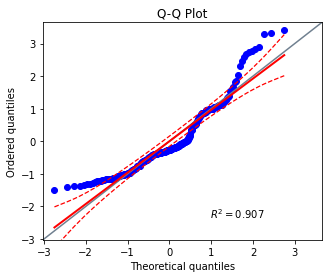

In [3]:
import pingouin as pg
import pandas as pd

df_subsdis=pd.read_csv('https://raw.githubusercontent.com/renatoparedes/IntroPythonInvestigacionPsicologia/master/AnalisisdeDatosCuantitativos/depression-data-subsdis.csv')
pg.qqplot(df_subsdis['schizophrenia'], dist='norm');

En este gráfico se aprecia que la línea azul que representa a los datos presenta curvaturas. Esto sugiere una desviación respecto a la distribución normal. 

Las **pruebas inferenciales** específicas de normalidad también están disponibles en todos los programas estadísticos. Los dos más comunes son la prueba de Shapiro-Wilks y una modificación de la prueba de Kolmogorov-Smirnov. Cada uno **calcula el nivel de significancia para las diferencias en relación a una distribución normal**. 

En concreto, se define que la **hipótesis nula es que la distribución a analizar es igual a una distribución normal**. 

El investigador siempre debe recordar que las pruebas de significación son menos útiles en muestras pequeñas (menos de 30) y bastante sensibles en muestras grandes (que superan las 1000 observaciones). 

En nuestro ejemplo, veamos a continuación el resultado de una prueba de Shapiro-Wilks:

In [4]:
pg.normality(df_subsdis['schizophrenia'],method='shapiro')

,W,pval,normal
schizophrenia,0.90627,7.514724e-11,False


Se sugiere utilizar esta prueba cuando se cuenta con una muestra pequeña (menos de 50). En caso contrario se puede optar por la prueba de Kolmogorov-Smirnov. 

Veamos ahora una alternativa adicional: la prueba de normalidad de D'Agostino y Pearson, cuyo estadístico $k$ se define matemáticamente como:

$$ k^{2} = z_{asimetría}^{2} + z_{curtosis}^{2}  $$

En nuestro ejemplo, esta prueba nos arroja como resultado:

In [5]:
pg.normality(df_subsdis['schizophrenia'],method='normaltest')

,W,pval,normal
schizophrenia,44.672307,1.993113e-10,False


### Igualdad de varianzas

La igualidad de varianzas o **homocedasticidad** se refiere a la suposición de que las **variables dependientes exhiben niveles iguales de varianza en todo el rango de variables predictoras**.

La homocedasticidad es deseable porque **la varianza de la variable dependiente que se explica en la relación de dependencia no debe concentrarse solo en un rango** limitado de valores independientes.

En la mayoría de las situaciones, tenemos muchos valores diferentes de la variable dependiente en cada valor de la variable independiente. Para que esta relación de dependencia se capture completamente, **la dispersión (varianza) de los valores de la variable dependiente debe ser relativamente igual en cada valor de la variable predictora**.

En general, la **heterocedasticidad hace que las predicciones sean mejores en algunos niveles de la variable independiente que en otros**. Esta variabilidad afecta los errores estándar y hace que las pruebas de hipótesis sean demasiado estrictas o demasiado insensibles.

#### Pruebas de homogeneidad de varianzas

Al analizar gráficamente la homogeneidad de varianzas, las desviaciones se muestran mediante formas como conos (pequeña dispersión en un lado del gráfico, gran dispersión en el lado opuesto) o diamantes (una gran cantidad de puntos en el centro de la distribución).

Para ilustrar, veamos la siguiente imagen tomada de Hair et al. 2019:

<p align="center">
  <img width="750" src="https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/AnalisisDeDatosMultivariantes/equal_vars.png" alt="Variable Types">
</p>

En la Figura 2.12a, los diagramas de dispersión de puntos de datos para dos variables ($V_{1}$ y $V_{2}$) con distribuciones normales exhiben la misma dispersión en todos los valores de datos (es decir, homocedasticidad).

Sin embargo, en la Figura 2.12b vemos una dispersión desigual (heterocedasticidad) causada por la asimetría de una de las variables $V_{3}$. Para los diferentes valores de $V_{3}$, existen diferentes patrones de dispersión para $V_{1}$.

Veamos ahora que ocurre en nuestro ejemplo:

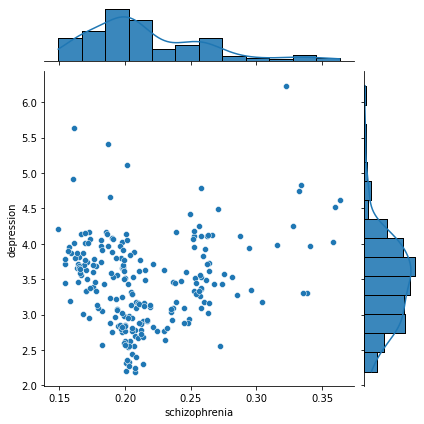

In [6]:
import seaborn as sns
ax = sns.jointplot(x='schizophrenia',y='depression',data=df_subsdis);
ax.plot_marginals(sns.histplot, kde=True);

Podemos apreciar que para los diferentes valores de la variable `depression` existen diferentes patrones de dispersion para la variable `schizophrenia`. 

Las **pruebas inferenciales** para la dispersión igual de varianza **evalúan la igualdad de varianzas dentro de grupos formados por variables categóricas**. 

La prueba más común, la prueba de **Levene**, se usa para evaluar si las varianzas de una sola variable métrica son iguales en cualquier número de grupos. 

Apliquemos la prueba de Levene en nuestro ejemplo:

In [7]:
pg.homoscedasticity(df_subsdis[['depression', 'schizophrenia']])

,W,pval,equal_var
levene,7.010673e+30,0.0,False


La prueba de Levene confirma que las varianzas de ambas distribuciones no son iguales, tal como intuíamos gráficamente. 

### Linealidad

Una suposición implícita de todas las técnicas multivariadas basadas en medidas correlacionales de asociación (incluida la regresión múltiple, la regresión logística, el análisis factorial y el modelado de ecuaciones estructurales) es la linealidad. 

Debido a que las correlaciones representan solo la asociación lineal entre variables, **los efectos no lineales no se representarán en el valor de correlación**. Esta omisión da como resultado una subestimación de la fuerza real de la relación. 

#### Pruebas de linealidad

La forma más común de evaluar la linealidad es **examinar diagramas de dispersión de las variables** e identificar cualquier patrón no lineal en los datos.

Veamos un diagrama de dispersión generado a partir de nuestro ejemplo:

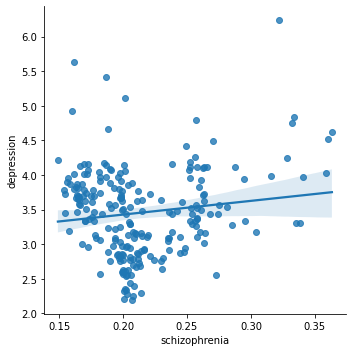

In [8]:
sns.lmplot(x='schizophrenia', y='depression', data=df_subsdis);

El gráfico de dispersión muestra que no existe una relación lineal entre las variables. 

Para facilitar esta visualización, se agrega una linea recta que ilustra la regresión entre la variable independiente `schizophrenia` y la variable dependiente `depression`. Como puede apreciarse, los puntos no se acercan a la línea y casi en su totalidad escapan al intervalo de confianza mostrado. 

Una manera alternativa de evaluar la linealidad es a través de los **residuos de un modelo de regresión**. 

Los residuos **reflejan la parte no explicada de la variable dependiente**; por lo tanto, cualquier parte no lineal de la relación se mostrará en los residuos. 

Si hay estructura en los residuos, asumir una relación lineal no es apropiado.

Veamos los residuos en nuestro ejemplo:

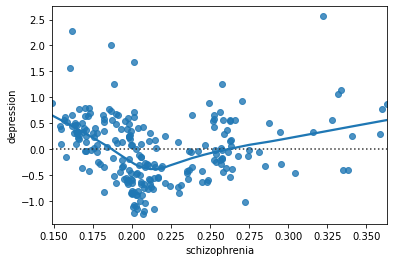

In [9]:
sns.residplot(x='schizophrenia',y='depression',data=df_subsdis,lowess=True);

En este tipo de gráficos, idealmente los valores deberían estar distribuidos aleatoriamente alrededor de `y = 0` (línea punteada). 

En nuestro ejemplo esto no se cumple y se puede observar que existe una estructura en nuestros residuos, la cual se grafica con la linea continua.

### Ausencia de errores correlacionados

Las predicciones en cualquiera de las técnicas de dependencia no son perfectas y rara vez encontraremos una situación en la que lo sean. Sin embargo, **intentamos asegurarnos de que los errores de predicción no estén correlacionados entre sí**. 

Por ejemplo, si encontramos un patrón que sugiere que solo algunos errores son positivos mientras que todos los demás son negativos, sabríamos que existe alguna relación sistemática inexplicable en la variable dependiente.

**Si existe tal situación, no podemos estar seguros de que nuestros errores de predicción sean independientes de los niveles en los que estamos tratando de predecir**. Algún otro factor está afectando los resultados, pero no se incluye en el análisis.

Examinaremos los modos de examinar la correlación en los errores más adelante en el curso.

## Transformación de los datos

Las transformaciones de datos proporcionan al investigador una amplia gama de métodos para lograr uno de los cuatro resultados básicos: 
- Mejorar las propiedades estadísticas
- Facilidad de interpretación
- Representar tipos de relación específicos
- Simplificación

En cada caso, **la variable original y sus valores se transforman de alguna manera para alterar sus características de modo que represente una faceta diferente de la información subyacente contenida en los valores**. 

Las transformaciones de datos pueden basarse en razones que son teóricas (transformaciones cuya idoneidad se basa en la naturaleza de los datos) o derivadas a partir de los datos (donde las transformaciones son sugeridas estrictamente por un examen de los datos). 

Cuando la explicación es importante (y no la predicción), **¡cuidado con las transformaciones!**

Las transformaciones **pueden cambiar la interpretación de las variables**. 

Por ejemplo, transformar variables tomando su logaritmo traduce la relación en una medida de cambio proporcional. Es decir, se impone una relación matemática que previamente no existía (o al menos desconocemos).

Por ello, asegúrate siempre de **explorar a fondo las posibles interpretaciones de las variables transformadas**.

Un ejemplo común en psicología se da en las escalas Likert. Al tratarse de variables ordinales una práctica común es transformarlas a variables cuantitativas continuas. 

La transformación más usual es la monótica: asumir que la distancia entre cada punto de la escala es equivalente. Esto es problemático debido a las diferencias individuales que pueden existir al momento de interpretar los puntos de una escala.  

A continuación presentamos algunas alternativas para transformar los datos a una distribución normal:

### Estandarización

En esta transformación, primero se diferencia cada valor de la media de la variable y luego se hace la diferencia relativa a las desviaciones estándar de la variable:

$$ z = \frac{(x - u)}{s} $$

El resultado es un conjunto de valores con una media de cero y una desviación estándar de 1

Apliquemos esta transformación a nuestro ejemplo:

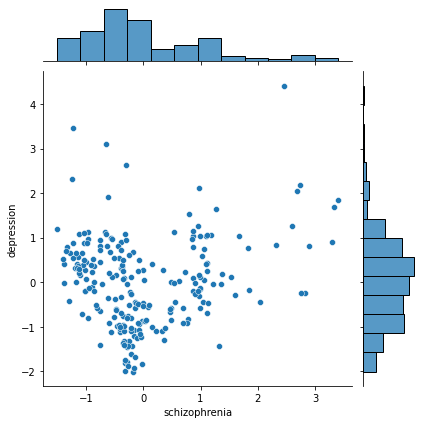

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_subsdis[['schizophrenia','depression']])
scaled_df = pd.DataFrame(scaled_data, columns=['schizophrenia','depression'])
sns.jointplot(x='schizophrenia',y='depression',data=scaled_df);

### Transformaciones de potencia

Las transformaciones de potencia son una familia de transformaciones paramétricas y monótonas **útiles para modelar problemas relacionados con la heterocedasticidad** (varianza no homogénea) u otras situaciones en las que se desea la normalidad.

En esta familia se encuentran la transformación Box-Cox y la transformación Yeo-Johnson. Box-Cox requiere que los datos de entrada sean estrictamente positivos, mientras que Yeo-Johnson admite datos tanto positivos como negativos.

Apliquemos una transformación de potencia a nuestro ejemplo:

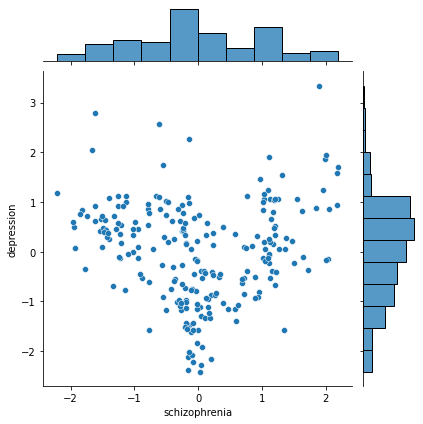

In [11]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
scaled_data = scaler.fit_transform(df_subsdis[['schizophrenia','depression']])
scaled_df = pd.DataFrame(scaled_data, columns=['schizophrenia','depression'])
sns.jointplot(x='schizophrenia',y='depression',data=scaled_df);

### Transformación por quantiles

Se utiliza una estimación de la función de distribución acumulativa de una distribución para **mapear los valores originales a una distribución normal**. 

A continuación, los valores obtenidos se asignan a la distribución de salida deseada utilizando la función de cuantiles asociada. Los datos nuevos/no vistos que caen por debajo o por encima del rango ajustado se asignarán a los límites de la distribución de salida. 

Ten en cuenta que esta transformación no es lineal. **Puede distorsionar las correlaciones lineales** entre variables medidas en la misma escala, pero hace que las variables medidas en diferentes escalas sean más directamente comparables.

/home/renato/.virtualenvs/statspsych/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (231). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


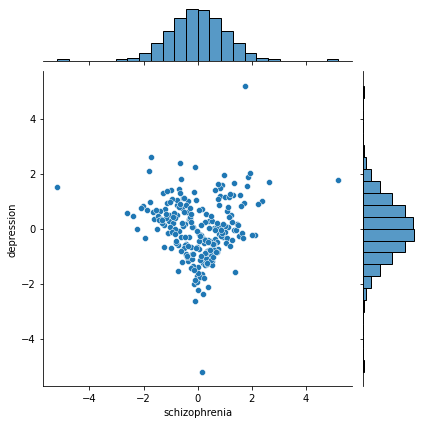

In [12]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(output_distribution='normal')
scaled_data = scaler.fit_transform(df_subsdis[['schizophrenia','depression']])
scaled_df = pd.DataFrame(scaled_data, columns=['schizophrenia','depression'])
sns.jointplot(x='schizophrenia',y='depression',data=scaled_df);